# Imports

In [1]:
import pandas as pd # dataframes
from sklearn.preprocessing import RobustScaler # scale to zero mean and unit variance
from sklearn.decomposition import PCA # primary component analysis
import matplotlib.pyplot as plt # plots
import seaborn as sns # advanced plots
import numpy as np # ndarrays

# Preprocess the Data Set

## General Preprocessing

In [2]:
df = pd.read_csv('./data/hcvdat22_Clustering.csv')

Some basic information on the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Age         615 non-null    int64  
 2   Sex         615 non-null    object 
 3   ALB         614 non-null    float64
 4   ALP         597 non-null    float64
 5   ALT         614 non-null    float64
 6   AST         615 non-null    float64
 7   BIL         615 non-null    float64
 8   CHE         615 non-null    float64
 9   CHOL        605 non-null    float64
 10  CREA        615 non-null    float64
 11  GGT         615 non-null    float64
 12  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


- there are 615 rows and 13 columns
- 5/13 columns have duplicate values
- we can drop the duplicate index and the categorical 'sex' column

In [4]:
df.drop(columns=['Unnamed: 0', 'Sex'], inplace=True)

Inspecting some rows of the data:

In [5]:
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Data Distribution

### Buggy: Run Twice
For an unknown reason, the function, when imported from another notebook, displays every plot on its first run. On the seoncd run, only the latest plot is shown.

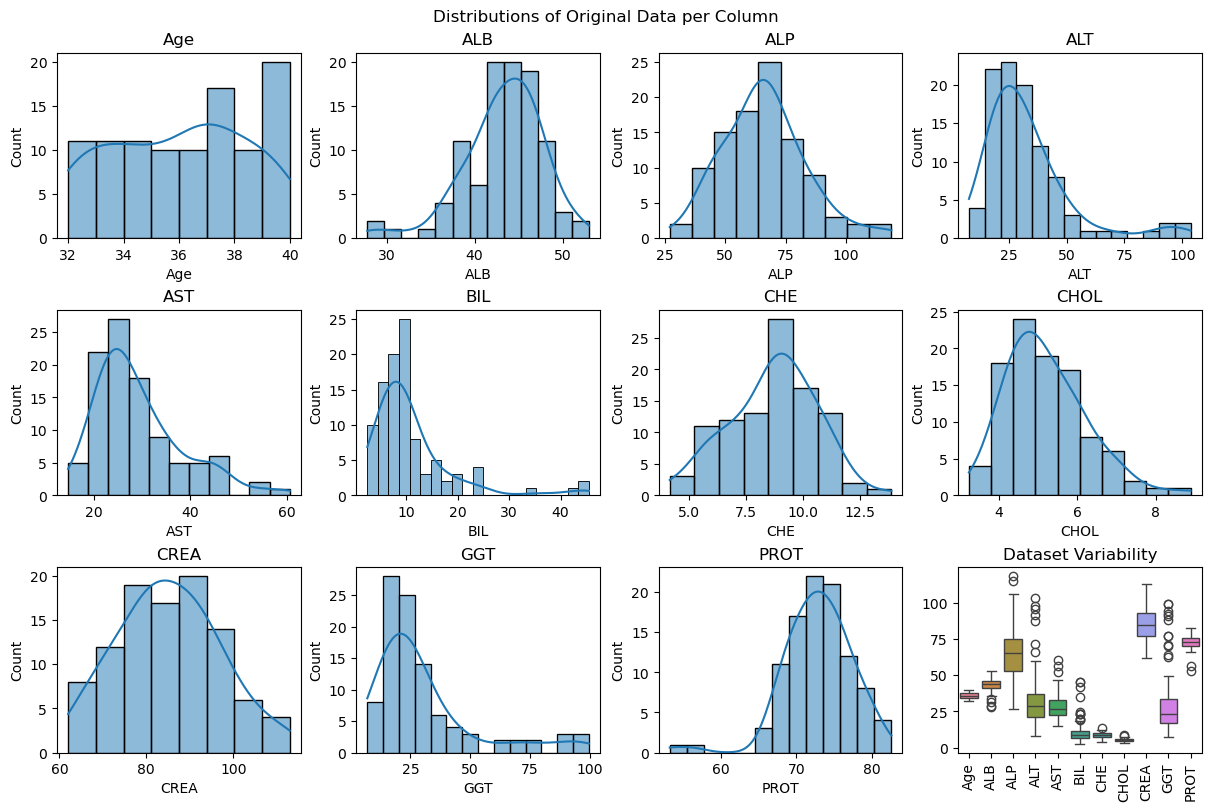

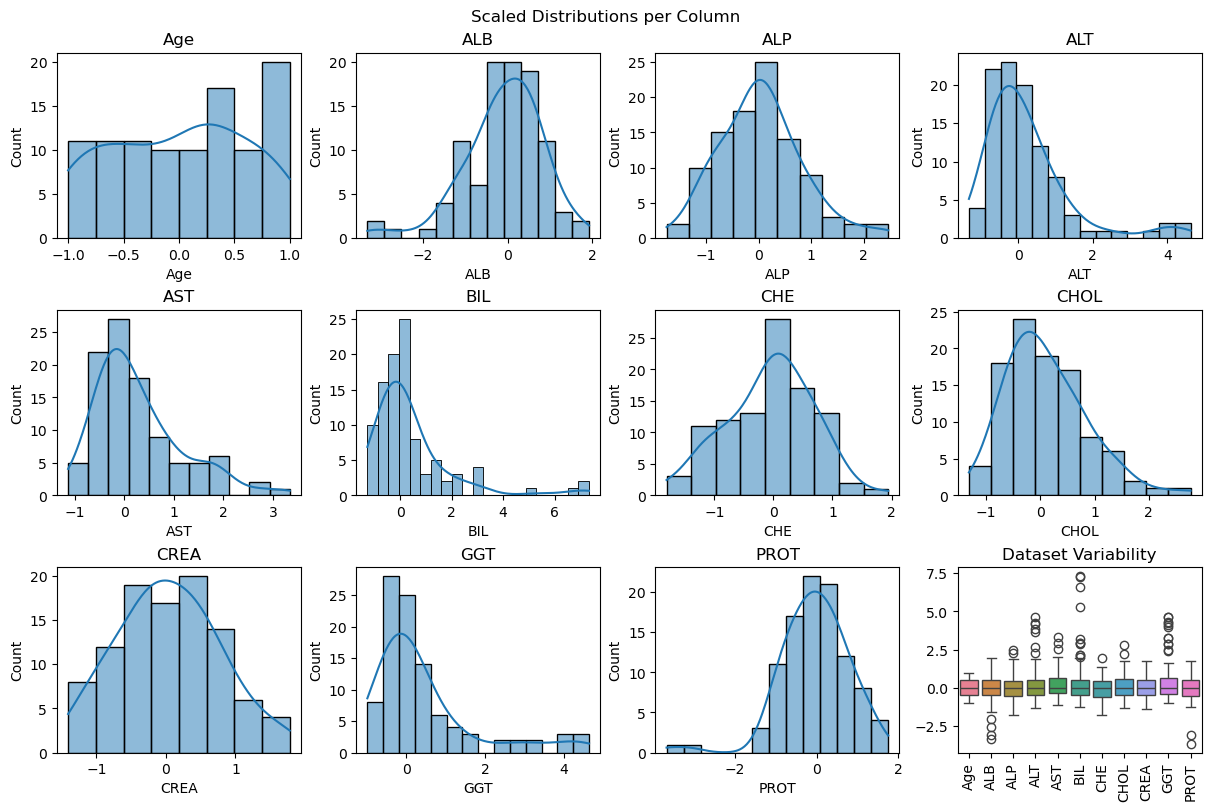

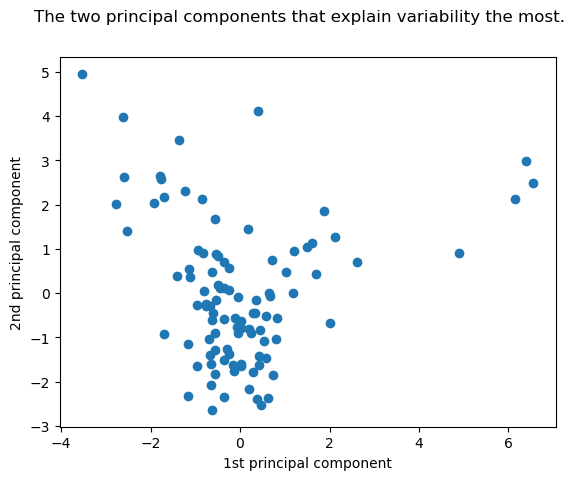

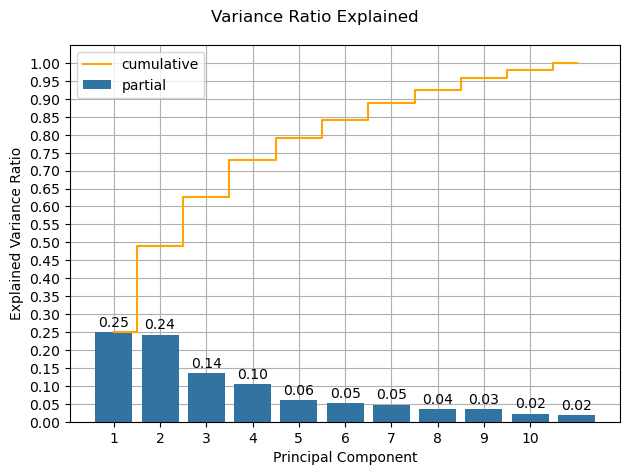

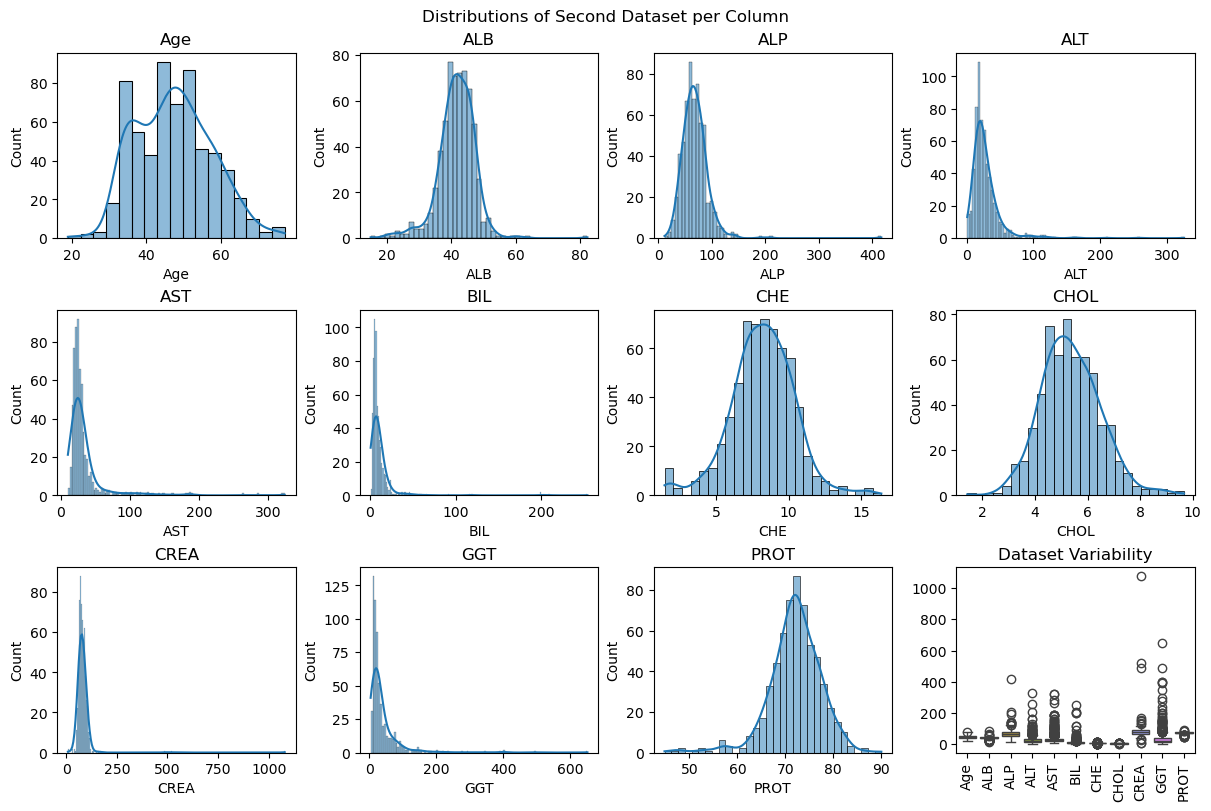

In [6]:
# import functions from other notebooks
# install with 'pip install ipynb' in active environment
from ipynb.fs.full.phase_1 import plot_feature_distribution
plot_feature_distribution(df=df, n_rows=3, n_cols=4, figsize=(12,8), suptitle='Distributions of Second Dataset per Column')

Except for age, all features mostly seem to follow a gaussian distribution. However, all features contain outliers which are most noticeable for CREA and GGT. These outliers could represent people for medical conditions  not suitable for blood donation, which we aim to identify.

## Impute Missing Values
- Estimate the accuracy of the imputation for each feature

How many rows with missing values are there?

In [7]:
na_rows = df[df.isna().any(axis=1)]
len(na_rows)

26

Inspect all 26 rows with missing values:

In [8]:
na_rows

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,43,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,32,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,33,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,46,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,48,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,48,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,57,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,38,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,19,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,29,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


In [9]:
idx_na_rows = na_rows.index

- rows have up to 3/11 NaN values
- 18/26 instances from ALP are NaN
    - keep them because they're only (18/615) ~ 2 % of the original data
- neither columns nor rows get dropped
- missing values get imputed

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights='uniform') # TODO: either add indicator or save missing_indicator separately
imputer.set_output(transform='pandas') # TODO: make set_output global
df_imputed = imputer.fit_transform(df)

Are there any missing values left?

In [11]:
len(df_imputed[df_imputed.isna().any(axis=1)])

0

## Scaling
Scale the features to zero mean and unit variance using a robust scaling approach to control for the effect of outliers and different scales:

In [12]:
scaler = RobustScaler() # instantiate scaler
scaler.set_output(transform='pandas')
df_scaled = scaler.fit_transform(df_imputed) # fit the scaler create scaled data

Inspect the scaled features:

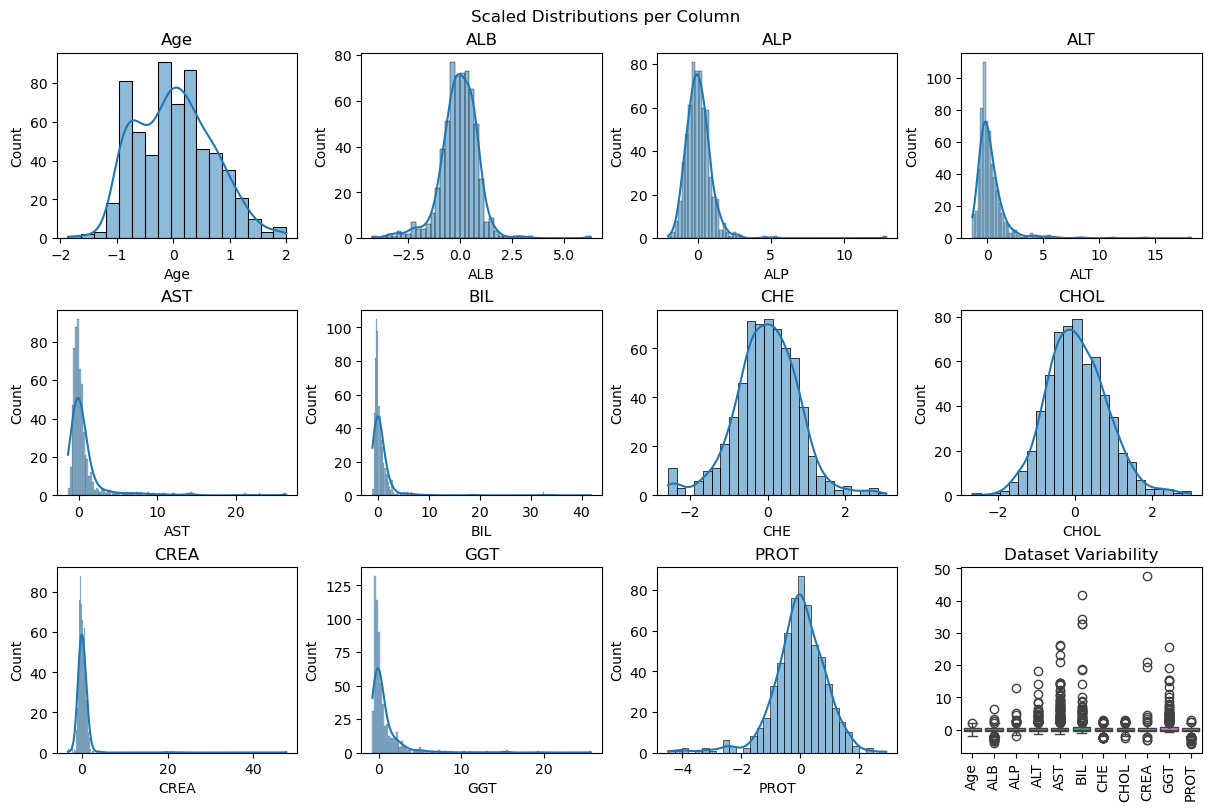

In [13]:
plot_feature_distribution(df=df_scaled, n_rows=3, n_cols=4, figsize=(12,8), suptitle='Scaled Distributions per Column')

The distributions look the same but in the dataset variability plot, we can observe how the scale has narrowed down significantly, making the pca less susceptible to outliers.

# Principal Component Analysis
- Transform the data into the principal components from phase one
- Would it make sense to retrain the PCA for the new data?
    - Yes, the very purpose of principal component analysis is to reduce the number of dimensions in data. This is usually desired to make data more computationally effective and easier to interpret for humans.

## Using the original (old) PCA

In [14]:
from ipynb.fs.full.phase_1 import pca as pca_old

In [15]:
pca_old.set_output(transform='pandas')
df_pca_old = pca_old.transform(df_scaled)
df_pca_old

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0.748379,-1.787788,0.706732,0.288839,-0.226765,1.735170,0.212730,0.809181,-0.313879,-0.280133,-0.641309
1,-0.291646,-1.231495,-0.362129,-0.409761,0.677303,-0.200896,-0.127501,1.170744,-1.112580,-0.499264,-0.113241
2,-0.822288,0.747969,-0.368645,-1.812024,-0.153357,0.534680,1.098403,1.113749,-0.165148,-0.295842,0.998065
3,1.649479,0.562556,0.054451,0.170991,-0.468530,-0.033739,0.458340,0.886178,-0.458751,0.528852,-0.361748
4,0.102498,-0.221614,0.770529,0.164499,0.418809,0.211510,0.319722,0.247266,-1.155392,0.044249,-0.288676
...,...,...,...,...,...,...,...,...,...,...,...
610,-4.999352,20.000441,-4.841333,13.918512,10.141212,4.219771,9.074799,-2.312820,4.285216,-3.656726,4.756661
611,1.492930,-0.098339,2.329949,1.449379,1.856363,-0.043446,1.165241,0.259238,3.196144,-1.154089,0.706497
612,4.309974,4.741834,2.286239,-0.118255,1.279704,0.356763,1.712641,1.592079,4.985101,-2.655404,3.801645
613,0.594385,1.876244,2.588382,0.222185,-0.316373,-0.559011,1.260377,0.679573,1.634018,-0.733811,1.790129


## Training a new PCA

In [16]:
from sklearn.decomposition import PCA

N_COMPONENTS = 11

pca_new = PCA(n_components=N_COMPONENTS)
pca_new.set_output(transform='pandas')
df_pca_new = pca_new.fit_transform(df_scaled)
df_pca_new

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-1.462480,1.042313,1.076771,-1.143684,-1.118833,0.795185,-1.212312,0.536089,0.847109,-0.187497,-0.280824
1,-1.881566,0.139353,-0.346541,-0.374329,-0.166495,-0.491697,0.096865,0.319567,1.240720,-0.797072,-0.863530
2,0.138931,-1.568102,-0.049304,-1.071518,0.684950,-1.244884,-0.244951,0.869585,0.492240,-0.411033,0.177776
3,0.198049,1.601098,-0.062795,0.207106,0.486246,-0.406497,-1.212862,0.283106,0.332993,-0.526004,0.075172
4,-0.835931,0.418478,-0.162654,0.198813,0.247316,0.694958,-0.391312,0.366956,1.247078,-0.068891,-0.141156
...,...,...,...,...,...,...,...,...,...,...,...
610,17.634927,-9.578179,4.106255,19.233989,-6.967243,-0.845646,4.047167,5.020149,1.422672,0.230760,0.641316
611,1.889115,0.910849,-0.867700,-0.315349,-2.379601,2.604784,0.404926,1.881201,-1.319079,-1.069987,-1.005965
612,8.435815,0.792994,-1.379162,-1.835511,-1.966351,0.273734,0.414639,1.679303,-1.769506,-1.429946,-1.049886
613,2.841743,-0.639315,-1.713603,-0.649893,-0.273452,1.536316,-0.866030,0.418820,-0.568240,-0.810746,0.062811


# Perform a Cluster Analysis
-Compare and discuss the results of the Anomaly Detection & Cluster Analysis

In [17]:
def cumulative_explained_ratio(pca: PCA):
    # calculate cumulative explained ratios for plotting
    cumulative_explained_ratio = []

    # loop over each principal component's explained variance ratio
    for index, value in enumerate(pca.explained_variance_ratio_):
        if len(cumulative_explained_ratio) == 0:
            # save the first value as is
            cumulative_explained_ratio.append(value)
        else:
            # add subsequent values to their predecessor and save
            cumulative_explained_ratio.append(value + cumulative_explained_ratio[index -1])

    return cumulative_explained_ratio

In [113]:
def scree_plot(ax: plt.axes, pca: PCA, title:str=None):
    # calculate the cumulative explained ratio
    explained_ratio = cumulative_explained_ratio(pca)

    # plots
    barplot = sns.barplot(pca.explained_variance_ratio_, ax=ax, label='partial')
    lineplot = sns.lineplot(explained_ratio ,ax=ax, drawstyle='steps-mid', color='orange', label='cumulative')

    # labels
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_xlabel('Principal Component')

    # grid
    ax.grid()
    ax.set_axisbelow(True)

    # legend
    ax.legend(loc='center right')

    # axes
    ax.set_yticks(np.linspace(0, 1, 21)) # steps of five on y-axis
    ax.set_xticks(range(0,11), range(1,12,1))

    # set a title
    ax.set_title(title)

    # display the values
    barplot.bar_label(ax.containers[0], fmt='{0:.2f}', padding=2)

    return ax

## Comparing Principal Components

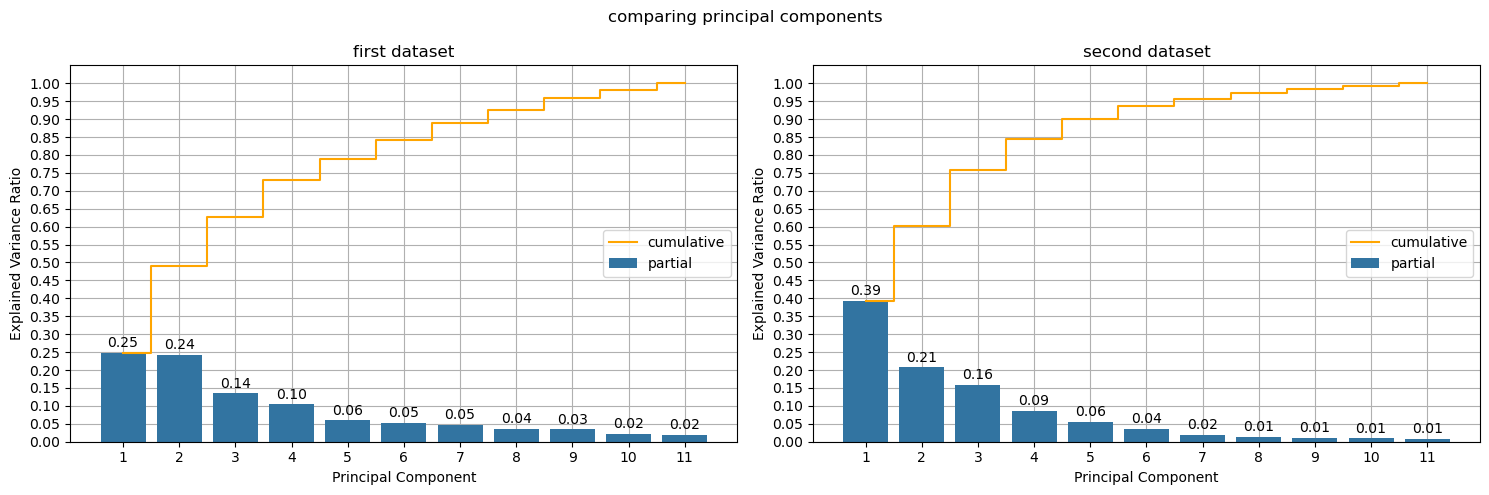

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), layout='tight')

scree_plot(ax=ax1, pca=pca_old, title='first dataset')
scree_plot(ax=ax2, pca=pca_new, title='second dataset')

fig.suptitle('comparing principal components')

plt.show()

## Cluster Analysis

### Old PCA

In [21]:
from ipynb.fs.full.phase_1 import clf as clf_old

In [22]:
predictions_old = clf_old.predict(df_pca_new)
df_pca_old['prediction'] = predictions_old

c:\Users\mfaig\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


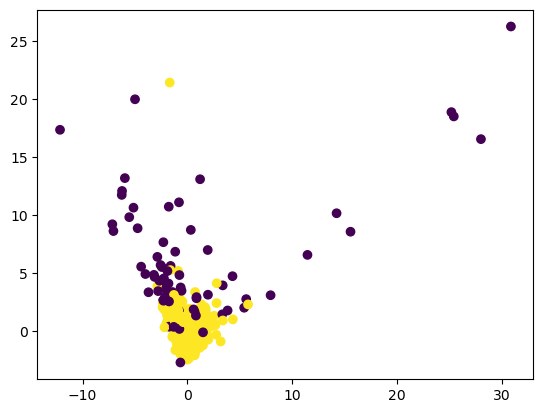

In [23]:
plt.scatter(x=df_pca_old['pca0'], y=df_pca_old['pca1'], c=df_pca_old.prediction)

### New PCA

In [24]:
from sklearn.ensemble import IsolationForest

clf_new = IsolationForest(max_samples=10, contamination=0.1, bootstrap=True, random_state=42)

In [25]:
predictions_new = clf_new.fit_predict(df_pca_new)

In [26]:
df_pca_new['prediction'] = predictions_new

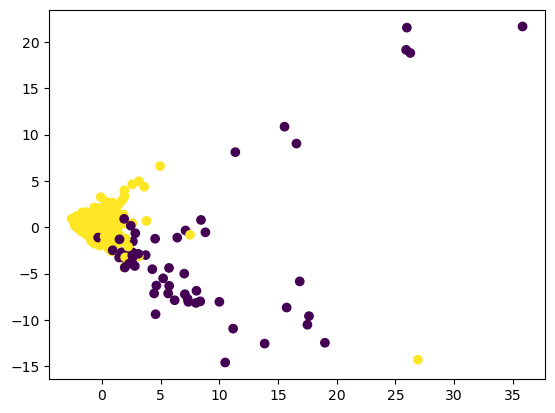

In [27]:
plt.scatter(x=df_pca_new['pca0'], y=df_pca_new['pca1'], c=df_pca_new.prediction)

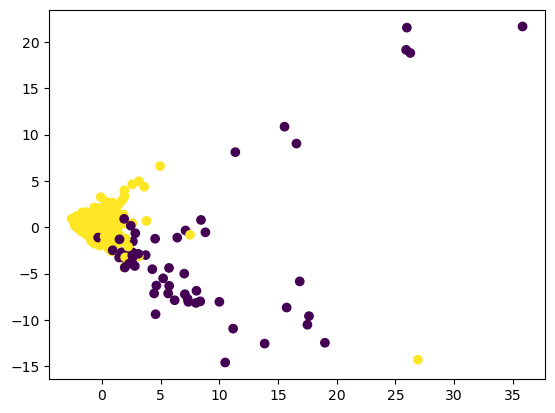

In [30]:
plt.scatter(x='pca0', y='pca1', c='prediction', data=df_pca_new)

### Decision Boundary

# Visualize Results so far
- Plot datapoints of the first PCs
- Decision Boundary of the Anomaly Detector
    - Color code clusters
    - Separate marker style for imputed data points